In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

x = scipy.stats.binom.rvs(n=1, p=0.75, random_state=1234, size=100)

Logaritmo de la verosimilitud en función de $p$ (Bernoulli)

$$
\log L (p) = \sum_i x_i \log p + (1-x_i) \log(1-p) 
$$

Primera derivada de la log verosimilitud 

$$
\frac{d \log L}{dp} = \sum_i \frac{x_i}{p} - \frac{1-x_i}{1-p} = \frac{\sum_i x_i - N p}{p(1-p)}
$$

Igualando a cero y asumiendo $p\neq0$ y $p \neq 1$

$$
\hat p = \frac{1}{N} \sum_i x_i
$$

Segunda derivada de la log verosimilitud

$$
\frac{d^2 \log L}{dp^2} = \sum_i - \frac{x_i}{p^2} - \frac{1-x_i}{(1-p)^2} = \frac{-N p^2 + 2p\sum_i x_i - \sum_i x_i}{p^2(1-p)^2} = \frac{-N p^2 + 2pN \hat p - N \hat p}{p^2(1-p)^2}
$$

Y la información de Fisher de $\hat p$

$$
\mathcal{I}(\hat p) = - \frac{d^2 \log L}{dp^2}(\hat p) = \frac{N \hat p - N\hat p^2}{(1-\hat p)^2 \hat p^2} = \frac{N}{(1-\hat p) \hat p}
$$

La incerteza del estimador es

$$
\sigma_{pp} = \sqrt {\left (\mathcal{I}(\hat p)  \right)^{-1}} = \sqrt { \frac{(1-\hat p) \hat p}{N}}
$$

<IPython.core.display.Javascript object>


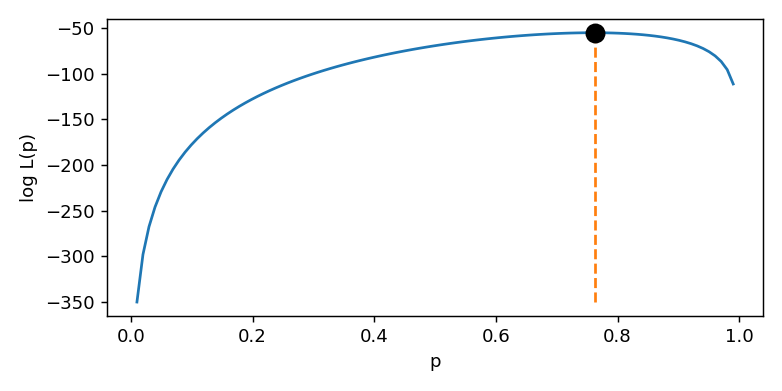

'Best p: 0.7623'

In [2]:
p = np.linspace(1e-2, 1-1e-2, num=100)
logL = np.log(p)*np.sum(x) + np.log(1-p)*(len(x)-np.sum(x))

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(p, logL); 
ax.scatter(p[np.argmax(logL)], np.amax(logL), s=100, c='k', zorder=100)
ax.plot([p[np.argmax(logL)], p[np.argmax(logL)]], [np.amin(logL), np.amax(logL)], linestyle='--')
ax.set_xlabel('p'); ax.set_ylabel('log L(p)');
display("Best p: %0.4f" %(p[np.argmax(logL)]))

Estimador MLE de $p$ en función de $N$

<IPython.core.display.Javascript object>


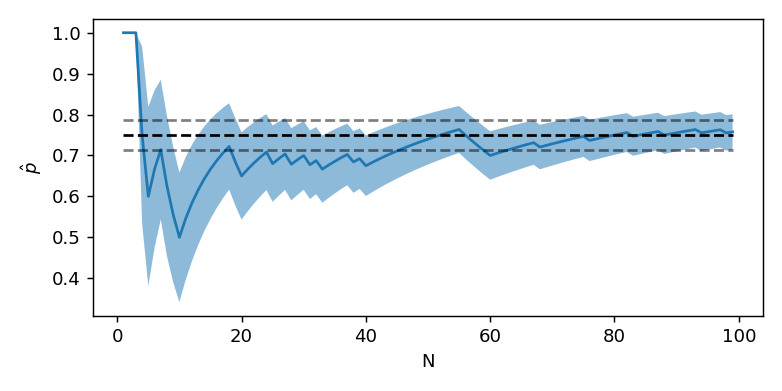

In [3]:
N = np.arange(1, 100, step=1)
hatp = np.array([np.mean(x[:n]) for n in N])
sigmap = np.sqrt(hatp*(1-hatp)/N)

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(N, hatp); 
ax.fill_between(N, hatp-sigmap, hatp+sigmap, alpha=0.5); 
ax.plot(N, [0.75]*99, 'k--')
ax.plot(N, [0.75*1.05]*99, 'k--', alpha=0.5)
ax.plot(N, [0.75*0.95]*99, 'k--', alpha=0.5)
ax.set_xlabel('N')
ax.set_ylabel(r'$\hat p$');

Extra: La incerteza está relacionada a la segunda derivada, es decir la curvatura de la verosimilitud

<IPython.core.display.Javascript object>


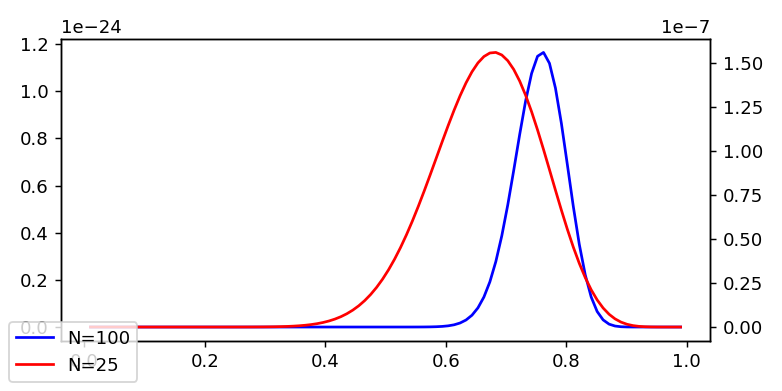

In [4]:
p = np.linspace(1e-2, 1.-1e-2, num=100)
L = lambda N, p: np.exp(np.log(p)*np.sum(x[:N]) + np.log(1-p)*(N-np.sum(x[:N])))

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(p, L(100, p), c='b', label='N=100'); 
ax2 = ax.twinx()
ax2.plot(p, L(25, p), c='r', label='N=25');
fig.legend(loc=3);

Si $X$ es una variable aleatoria que se distribuye Bernoulli con parámetro $p$

$$
\mathbb{E}[X] = \sum_{x=0}^{1} x p^x (1-p)^{1-x} = p 
$$

Osea que 

$$
\mathbb{E}[\hat p] = \frac{1}{N} \sum_i \mathbb{E}[x_i] =  \frac{Np}{N} = p
$$

porque asumimos que son *iid*

El estimador de máxima verosimilitud de $p$ es insesgado!